[*********************100%***********************]  1 of 1 completed


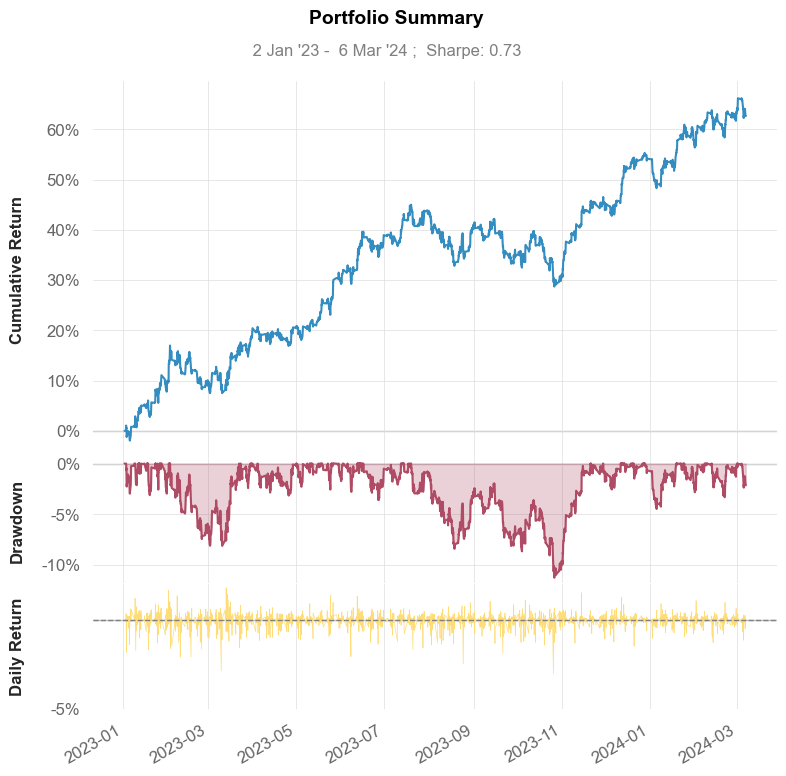

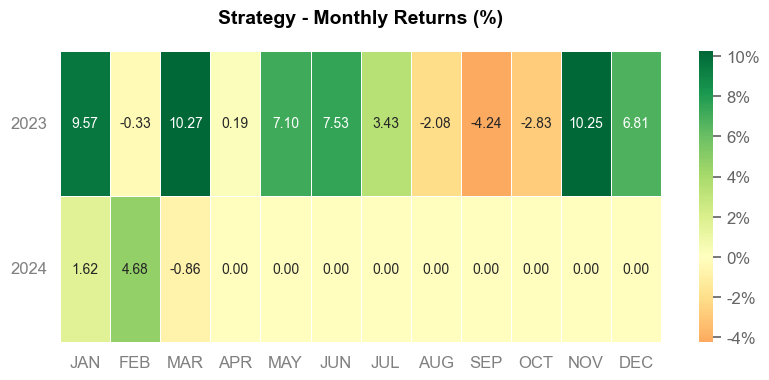

c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


                           Strategy
-------------------------  ------------------------
Start Period               2023-01-03
End Period                 2024-03-06
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -
CAGR﹪                     33.16%

Sharpe                     0.73
Prob. Sharpe Ratio         99.71%
Smart Sharpe               0.72
Sortino                    0.91
Smart Sortino              0.91
Sortino/√2                 0.65
Smart Sortino/√2           0.64
Omega                      1.17

Max Drawdown               -11.24%
Longest DD Days            124
Volatility (ann.)          2956445.89%
Calmar                     2.95
Skew                       -0.12
Kurtosis                   -0.87

Expected Daily %           -
Expected Monthly %         -
Expected Yearly %          -
Kelly Criterion            9.41%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1175346.94%
Expected Shortfall (cVaR)  -0.48%

Max Consecutive 

c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered 

In [9]:
import yfinance as yf
import quantstats as qs
import sqlite3
import pandas as pd

# Function to retrieve historical data using yfinance
def get_historical_data(ticker, start_date, end_date, interval='1h'):
    df = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return df

# Function to calculate daily pivot
def calculate_pivot(data):
    data['Pivot'] = (data['High'] + data['Low'] + data['Close']) / 3
    return data['Pivot']

# Function to perform the backtest
def backtest(ticker, start_date, end_date, stop_loss, take_profit, starting_balance, slippage):
    # Get historical data
    data = get_historical_data(ticker, start_date, end_date)

    # Calculate daily pivot
    data['Pivot'] = calculate_pivot(data)

    # Initialize variables
    balance = starting_balance
    position_size = 0
    trades = []

    # Iterate through the data to simulate the backtest
    for i in range(1, len(data)):
        current_price = data['Close'][i]
        pivot = data['Pivot'][i-1]

        # Check for a buy condition
        if current_price > pivot:
            # Buy condition
            position_size = balance // current_price
            balance -= position_size * (current_price + slippage)
            stop_loss_price = current_price - stop_loss
            take_profit_price = current_price + take_profit
            trades.append(('Buy', data.index[i], current_price, position_size))

    # Calculate and print the backtest results
    result_df = pd.DataFrame(trades, columns=['Action', 'Date', 'Price', 'Position Size'])
    result_df.set_index('Date', inplace=True)

    qs.reports.plots(result_df['Price'], title='Pivot Bounce Backtest')
    qs.reports.metrics(result_df['Price'], mode='full')

    return result_df

# Set parameters
ticker = 'MNQ=F'  # Mini Nasdaq 100 Futures
start_date = '2023-01-01'
end_date = '2024-03-07'
stop_loss = 40
take_profit = 20
starting_balance = 10000
slippage = 0.25

# Run the backtest
result_df = backtest(ticker, start_date, end_date, stop_loss, take_profit, starting_balance, slippage)

# Save backtest results to SQLite database
conn = sqlite3.connect('backtest_results.db')
result_df.to_sql('backtest_results', conn, if_exists='replace')
conn.close()


[*********************100%***********************]  1 of 1 completed


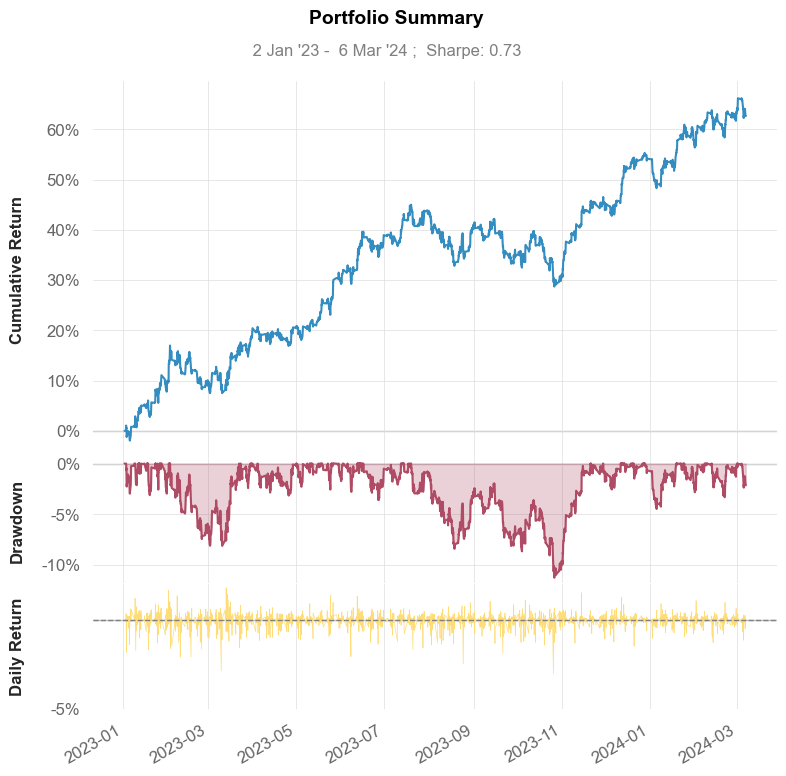

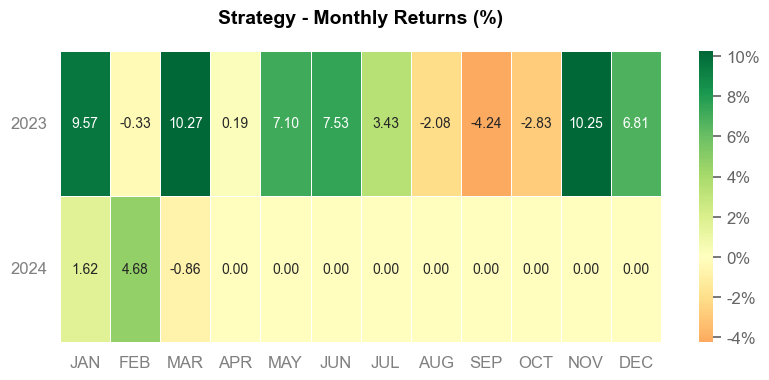

c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


                           Strategy
-------------------------  ------------------------
Start Period               2023-01-03
End Period                 2024-03-06
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -
CAGR﹪                     33.16%

Sharpe                     0.73
Prob. Sharpe Ratio         99.71%
Smart Sharpe               0.72
Sortino                    0.91
Smart Sortino              0.91
Sortino/√2                 0.65
Smart Sortino/√2           0.64
Omega                      1.17

Max Drawdown               -11.24%
Longest DD Days            124
Volatility (ann.)          2956445.89%
Calmar                     2.95
Skew                       -0.12
Kurtosis                   -0.87

Expected Daily %           -
Expected Monthly %         -
Expected Yearly %          -
Kelly Criterion            9.41%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1175346.94%
Expected Shortfall (cVaR)  -0.48%

Max Consecutive 

c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered 

In [10]:
import yfinance as yf
import quantstats as qs
import sqlite3
import pandas as pd

# Function to retrieve historical data using yfinance
def get_historical_data(ticker, start_date, end_date, interval='1h'):
    df = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return df

# Function to calculate daily pivot
def calculate_pivot(data):
    data['Pivot'] = (data['High'] + data['Low'] + data['Close']) / 3
    return data['Pivot']

# Function to perform the backtest
def backtest(ticker, start_date, end_date, stop_loss, take_profit, starting_balance, slippage):
    # Get historical data
    data = get_historical_data(ticker, start_date, end_date)

    # Calculate daily pivot
    data['Pivot'] = calculate_pivot(data)

    # Initialize variables
    balance = starting_balance
    position_size = 0
    trades = []

    # Iterate through the data to simulate the backtest
    for i in range(1, len(data)):
        current_price = data['Close'][i]
        pivot = data['Pivot'][i-1]

        # Check for a buy condition
        if current_price > pivot:
            # Buy condition
            entry_date = data.index[i]
            position_size = balance // current_price
            entry_price = current_price
            balance -= position_size * (current_price + slippage)
            stop_loss_price = current_price - stop_loss
            take_profit_price = current_price + take_profit
            trades.append(('Buy', entry_date, entry_price, position_size, 0))  # 0 for exit values

    # Calculate and print the backtest results
    result_df = pd.DataFrame(trades, columns=['Action', 'Date', 'Entry Price', 'Position Size', 'Exit Price'])
    result_df.set_index('Date', inplace=True)

    qs.reports.plots(result_df['Entry Price'], title='Pivot Bounce Backtest')
    qs.reports.metrics(result_df['Entry Price'], mode='full')

    # Save backtest results to SQLite database
    conn = sqlite3.connect('backtest_results.db')
    result_df.to_sql('backtest_results', conn, if_exists='replace')
    conn.close()

    # Save trades to CSV
    trades_csv = result_df.copy()
    trades_csv['Exit Price'] = 0
    trades_csv.to_csv('trades.csv')

    return result_df

# Set parameters
ticker = 'MNQ=F'  # Mini Nasdaq 100 Futures
start_date = '2023-01-01'
end_date = '2024-03-07'
stop_loss = 40
take_profit = 20
starting_balance = 10000
slippage = 0.25

# Run the backtest
result_df = backtest(ticker, start_date, end_date, stop_loss, take_profit, starting_balance, slippage)
